# Fake News Detection

In [93]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string
from sklearn.metrics import confusion_matrix

In [4]:
df_data_fake = pd.read_csv("Fake.csv")
df_data_true = pd.read_csv("True.csv")

In [5]:
df_data_fake.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [6]:
df_data_true.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


**Inserting a column "class" as a target feature"**

In [7]:
df_data_fake["class"] = 0
df_data_true["class"] = 1

In [8]:
df_data_fake.shape

(23481, 5)

In [9]:
df_data_true.shape

(21417, 5)

**Checking for null values**

In [10]:
df_data_fake.isnull().sum()

title      0
text       0
subject    0
date       0
class      0
dtype: int64

In [11]:
df_data_true.isnull().sum()

title      0
text       0
subject    0
date       0
class      0
dtype: int64

**As we can see both the columns have no null values, so we can proceed further**

**Removing last 10 rows for manual testing on both the datasets** 

In [12]:
df_fake_mtesting = df_data_fake.tail(10)
for i in range(23480,23470,-1):
    df_data_fake.drop([i], axis = 0, inplace = True)
    
    
df_true_mtesting = df_data_true.tail(10)
for i in range(21416,21406,-1):
    df_data_true.drop([i], axis = 0, inplace = True)

In [13]:
df_data_fake.shape, df_data_true.shape

((23471, 5), (21407, 5))

In [14]:
df_fake_mtesting.loc[:, "class"] = 0
df_true_mtesting.loc[:, "class"] = 1

In [15]:
df_fake_mtesting.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [16]:
df_true_mtesting.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


**Concatenating both the manual testing datasets in .csv file to perform further operations**

In [17]:
df_manual_testing = pd.concat([df_fake_mtesting,df_true_mtesting], axis = 0)
df_manual_testing.to_csv("manual_testing.csv")

**Merging True and Fake Dataframes**

In [18]:
df_data = pd.concat([df_data_fake, df_data_true], axis =0 )
df_data.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [19]:
df_data.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

**Removing columns which are not required**

In [20]:
df = df_data.drop(["title", "subject","date"], axis = 1)

In [21]:
df.isnull().sum()

text     0
class    0
dtype: int64

**Random Shuffling**

In [22]:
df = df.sample(frac = 1)

In [23]:
df.head()

,text,class
19010,Federal lawmakers are investigating how a form...,0
11039,From Hanlon s piece in the New Republic:Reject...,0
3546,"This morning, President-elect made yet another...",0
18330,MOSCOW (Reuters) - Venezuelan President Nicola...,1
19359,"FLORENCE, Italy (Reuters) - Britain wants to b...",1


In [24]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [25]:
df.columns

Index(['text', 'class'], dtype='object')

In [26]:
df.head()

,text,class
0,Federal lawmakers are investigating how a form...,0
1,From Hanlon s piece in the New Republic:Reject...,0
2,"This morning, President-elect made yet another...",0
3,MOSCOW (Reuters) - Venezuelan President Nicola...,1
4,"FLORENCE, Italy (Reuters) - Britain wants to b...",1


**Let's preprocess texts by converting it to lowercase, removing square brackets and their contents, replacing non-word characters with spaces, removing URLs, HTML tags, punctuation, newline characters, and words containing digits. The goal is often to clean the text and remove noise before further analysis, such as natural language processing or machine learning tasks.**

In [27]:
def convert(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [28]:
df["text"] = df["text"].apply(convert)

**Defining dependent and independent variables**

In [29]:
X = df["text"]
y = df["class"]

In [30]:
# Splitting Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

**Converting texts to vectors**

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(X_train)
xv_test = vectorization.transform(X_test)

# Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
df_lr = LogisticRegression()
df_lr.fit(xv_train,y_train)

LogisticRegression()

In [35]:
pred_lr=df_lr.predict(xv_test)

In [36]:
df_lr.score(xv_test, y_test)

0.9869875222816399

In [37]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5875
           1       0.99      0.99      0.99      5345

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



# Decision Tree Classification

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
df_dt = DecisionTreeClassifier()
df_dt.fit(xv_train, y_train)

DecisionTreeClassifier()

In [40]:
pred_dt = df_dt.predict(xv_test)

In [41]:
df_dt.score(xv_test, y_test)

0.9964349376114082

In [42]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5875
           1       1.00      1.00      1.00      5345

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [88]:
# Importing Tree Library from sklearn 
from sklearn import tree

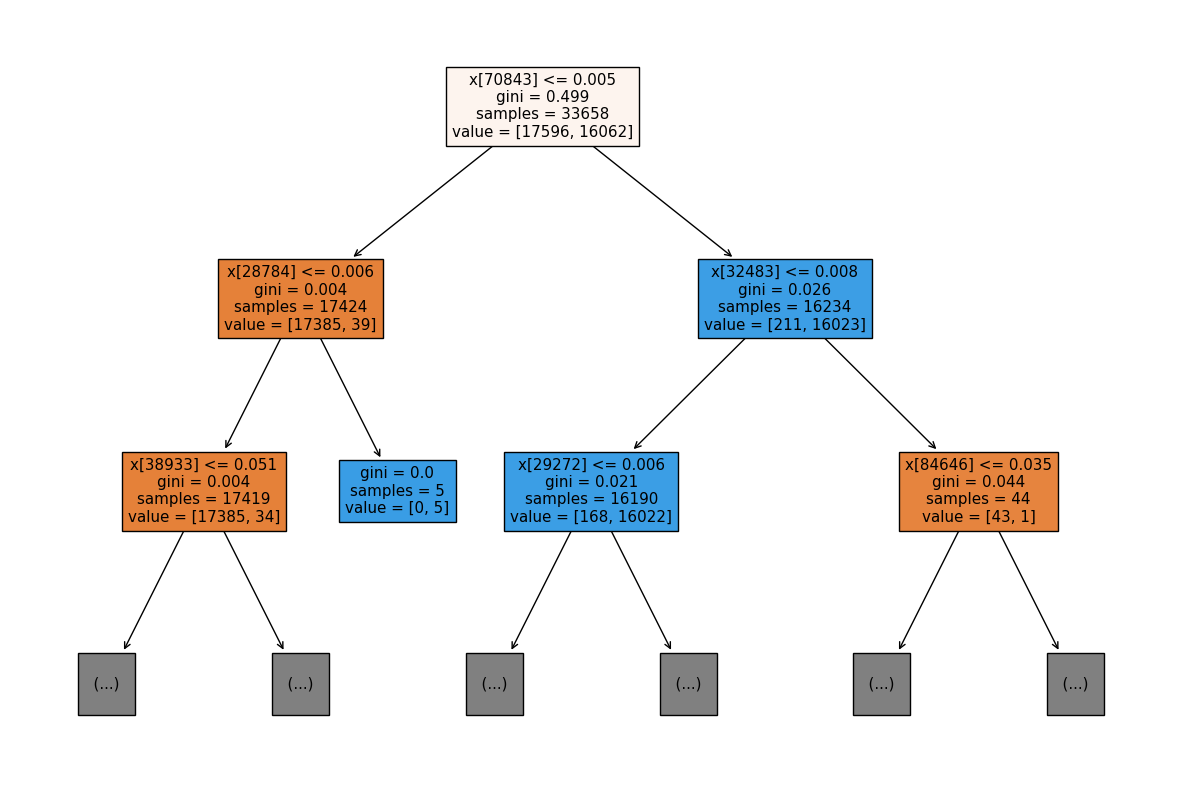

In [44]:
# Visualize
max_depth = 2
plt.figure(figsize=(15, 10))
tree.plot_tree(df_dt, filled=True, max_depth=max_depth)
plt.show()

# Gradient Boosting Classifier

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

In [46]:
df_gbc = GradientBoostingClassifier(random_state=0)
df_gbc.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [47]:
pred_gbc = df_gbc.predict(xv_test)

In [48]:
df_gbc.score(xv_test, y_test)

0.995632798573975

In [49]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5875
           1       0.99      1.00      1.00      5345

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



**Visualization left**

In [72]:
# Feature Importances for Gradient Boosting Classifier
feature_importances_gbc = df_gbc.feature_importances_

# Sort feature importances in descending order
indices_gbc = np.argsort(feature_importances_gbc)[::-1]

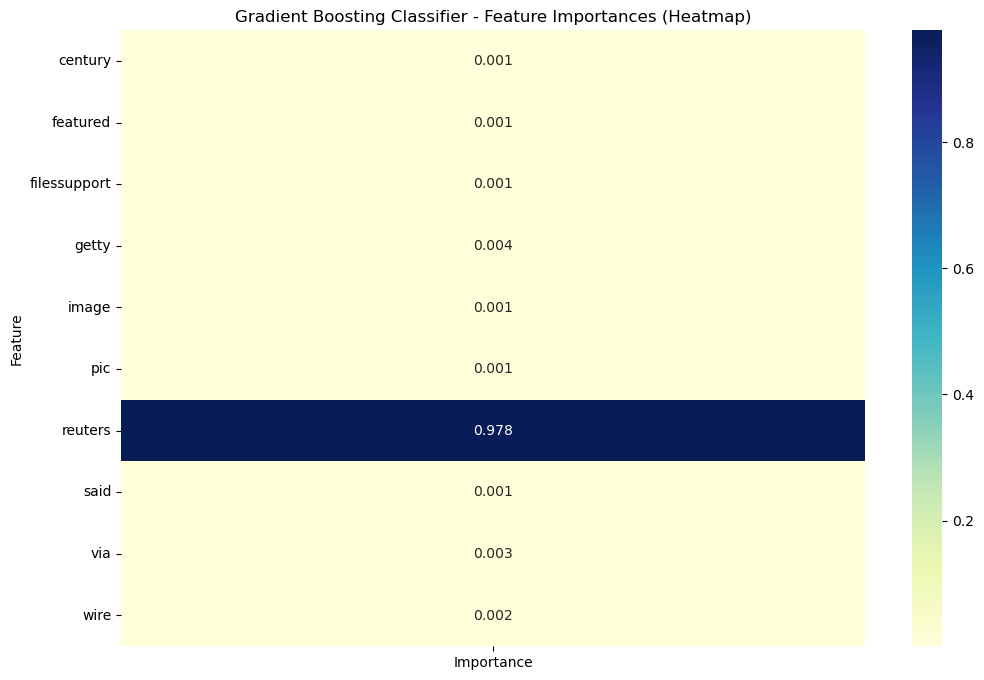

In [82]:
# Assuming you want to plot only the top 20 features
top_n_features = 10

# Create a DataFrame for better handling
df_feature_importance = pd.DataFrame({'Feature': vectorization.get_feature_names_out()[indices_gbc][:top_n_features],
                                      'Importance': feature_importances_gbc[indices_gbc][:top_n_features]})

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_feature_importance.pivot_table(index="Feature", values="Importance"), cmap="YlGnBu", annot=True, fmt=".3f")
plt.title("Gradient Boosting Classifier - Feature Importances (Heatmap)")
plt.show()


In [90]:
from sklearn.tree import plot_tree

In [92]:
# # Assuming df_gbc is your Gradient Boosting Classifier model
# num_estimators = len(df_gbc.estimators_)
# num_rows = (num_estimators // 2) + (num_estimators % 2)  # Calculate the number of rows needed

# plt.figure(figsize=(15, 5 * num_rows))
# for i in range(num_estimators):
#     plt.subplot(num_rows, 2, i + 1)
#     plot_tree(df_gbc.estimators_[i][0], filled=True, feature_names=vectorization.get_feature_names_out(), class_names=['Fake', 'Real'], rounded=True)
#     plt.title(f'Tree {i + 1}')

# plt.tight_layout()
# plt.show()

# Random Forest Classifier

In [51]:
# !pip install mglearn

In [52]:
from sklearn.ensemble import RandomForestClassifier
import mglearn

In [53]:
df_rfc = RandomForestClassifier(random_state=0, n_estimators=100)
df_rfc.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [54]:
pred_rfc = df_rfc.predict(xv_test)

In [55]:
df_rfc.score(xv_test, y_test)

0.989126559714795

In [56]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5875
           1       0.99      0.99      0.99      5345

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



**Visualization left**

# Confusion Matrix

In [97]:
cm_lr = confusion_matrix(y_test, pred_lr)
cm_dt = confusion_matrix(y_test, pred_dt)
cm_gbc = confusion_matrix(y_test, pred_gbc)
cm_rfc = confusion_matrix(y_test, pred_rfc)

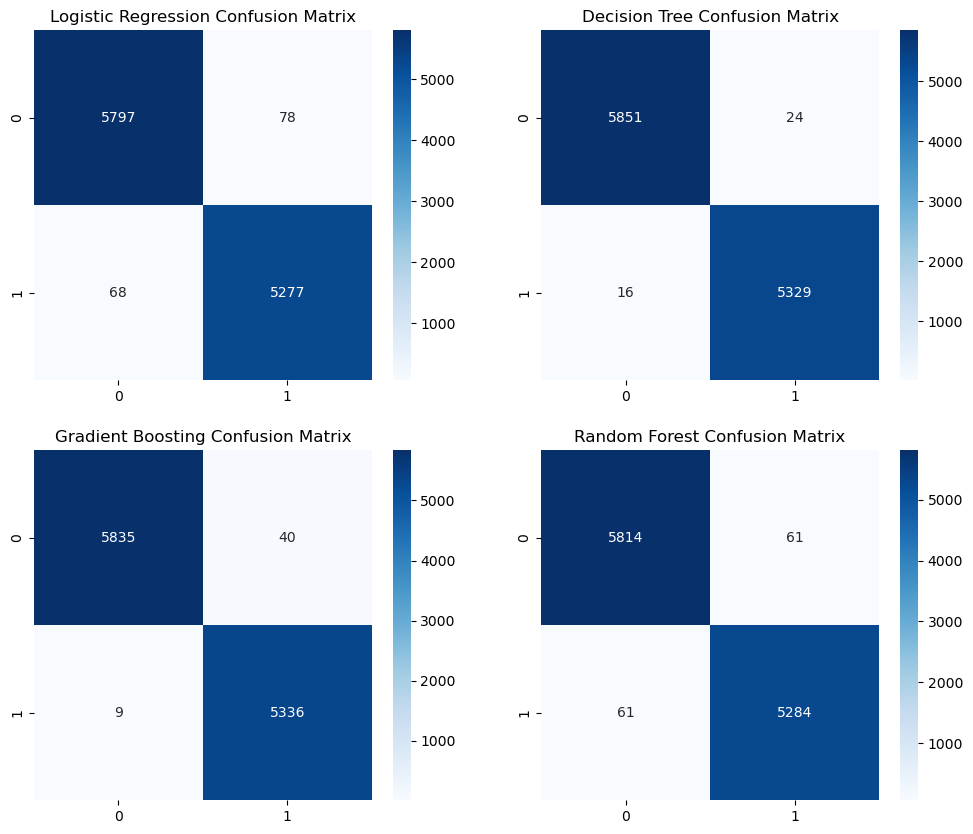

In [98]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title('Logistic Regression Confusion Matrix')

sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1])
axes[0, 1].set_title('Decision Tree Confusion Matrix')

sns.heatmap(cm_gbc, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0])
axes[1, 0].set_title('Gradient Boosting Confusion Matrix')

sns.heatmap(cm_rfc, annot=True, fmt='d', cmap='Blues', ax=axes[1, 1])
axes[1, 1].set_title('Random Forest Confusion Matrix')

plt.show()

# ROC Curve

In [99]:
from sklearn.metrics import roc_curve, auc

In [103]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, df_lr.predict_proba(xv_test)[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_dt, tpr_dt, _ = roc_curve(y_test, df_dt.predict_proba(xv_test)[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_gbc, tpr_gbc, _ = roc_curve(y_test, df_gbc.predict_proba(xv_test)[:, 1])
roc_auc_gbc = auc(fpr_gbc, tpr_gbc)

fpr_rfc, tpr_rfc, _ = roc_curve(y_test, df_rfc.predict_proba(xv_test)[:, 1])
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)

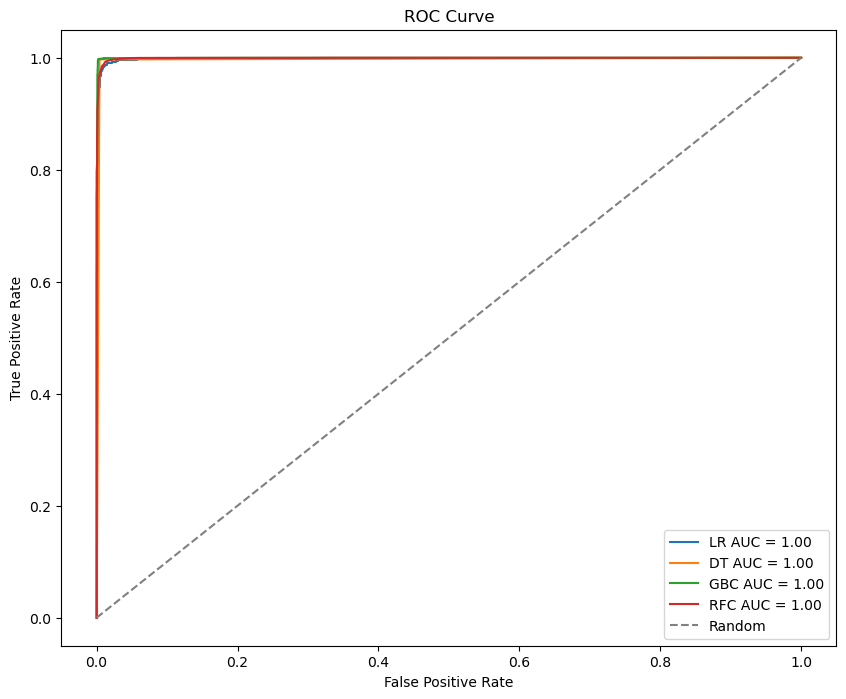

In [101]:
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, label=f'LR AUC = {roc_auc_lr:.2f}')
plt.plot(fpr_dt, tpr_dt, label=f'DT AUC = {roc_auc_dt:.2f}')
plt.plot(fpr_gbc, tpr_gbc, label=f'GBC AUC = {roc_auc_gbc:.2f}')
plt.plot(fpr_rfc, tpr_rfc, label=f'RFC AUC = {roc_auc_rfc:.2f}')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Model Testing

In [62]:
def output(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Real News"
    
def manual_testing(news):
    testing_news = {"text": [news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(convert)  # Assuming convert is defined
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = df_lr.predict(new_xv_test)
    pred_DT = df_dt.predict(new_xv_test)
    pred_GBC = df_gbc.predict(new_xv_test)
    pred_RFC = df_rfc.predict(new_xv_test)

    # Add a closing parenthesis to the return statement
    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(
        output(pred_LR[0]), output(pred_DT[0]), output(pred_GBC[0]), output(pred_RFC[0])))


In [63]:
news = str(input())
manual_testing(news)



LR Prediction: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Fake News


In [64]:
news = str(input())
manual_testing(news)



LR Prediction: Real News 
DT Prediction: Real News 
GBC Prediction: Real News 
RFC Prediction: Real News


# Clustering with KMeans